<a href="https://colab.research.google.com/github/MariaZharova/3-day-intensive/blob/main/ml_models_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<center>
    <h1><font color="red">Machine Learning with Scikit-Learn</font></h1>
</center>

In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
  <head> </head>
  <body>
<script src="https://bot.voiceatlas.mysmce.com/v1/chatlas.js"></script>
<app-chatlas
	atlas-id="f759a188-f8bb-46bb-9046-3b1b961bd6aa"
	widget-background-color="#3f51b5ff"
	widget-text-color="#ffffffff"
	widget-title="Chatlas">
</app-chatlas>
  </body>
</html>

## Useful Links

- <a href="https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660">Calculating Simple Linear Regression and Linear Best Fit an In-depth Tutorial with Math and Python</a>
- <a href="https://scikit-learn.org/stable/tutorial/index.html">scikit-learn Tutorials</a>
- <a href="https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a">Sklearn Linear Regression Tutorial with Boston House Dataset</a>
- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>
- <a href="https://debuggercafe.com/image-classification-with-mnist-dataset/">Image Classification with MNIST Dataset</a>
- <a href="https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/">MNIST handwritten number identification</a>

# <font color="red">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python. 
- Provides a selection of efficient tools for machine learning and statistical modeling including: 
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation 
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.


![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
Image Source: ulhpc-tutorials.readthedocs.io

## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
print(f"Numpy version:        {np.__version__}")
print(f"Pandas version:       {pd.__version__}")
print(f"Seaborn version:      {sns.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Numpy version:        1.21.6
Pandas version:       1.3.5
Seaborn version:      0.11.2
Scikit-Learn version: 1.0.2


# <font color="blue">Numerical Data</font>

## <font color="red">Boston Dataset</font>
- Contains information about different houses in Boston.
- There are 506 samples and 13 feature variables in this dataset. 
- Maintained at Carnegie Mellon University.
- <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">This is a copy of UCI ML housing dataset</a>.

We want to predict the value of prices of the house using the given features. 

### Obtain the Dataset

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features of the Dataset

In [ ]:
print("Keys: ", boston_data.keys())

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print("Shape: ", boston_data.data.shape)

Shape:  (506, 13)


In [ ]:
print("Feature Names: ", boston_data.feature_names)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **CRIM** |    Per capita crime rate by town |
|**ZN** |   Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** |  Nitric oxides concentration (parts per 10 million) |
| **RM** |    Average number of rooms per dwelling |
| **AGE** |   roportion of owner-occupied units built prior to 1940 |
| **DIS** |  weighted distances to five Boston employment centres |
| **RAD** |   index of accessibility to radial highways |
| **TAX** |  full-value property-tax rate per \$10,000 |
| **PTRATIO** |  pupil-teacher ratio by town |
| **B** |       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** |    % lower status of the population |
| **MEDV** |    Median value of owner-occupied homes in $1000's |

## <font color="red">Extract Data</font>

**Pass the data into a Pandas dataframe**

In [ ]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Relabel the columns using the Boston dataset feature names

In [ ]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Add home prices to the Pandas dataframe

In [ ]:
boston_data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (506,)


In [ ]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check the types of features:

In [ ]:
bos_pd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## <font color="red">Exploratory Data Analysis</font>

- Important step before training the model. 
- We use statistical analysis and visualizations to understand the relationship of the target variable with other features.

#### Check Missing Values
It is a good practice to see if there are any missing values in the data. 

Count the number of missing values for each feature

In [ ]:
bos_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Obtain basic statistics on the data

In [ ]:
bos_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
bos_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Distribution of the target variable

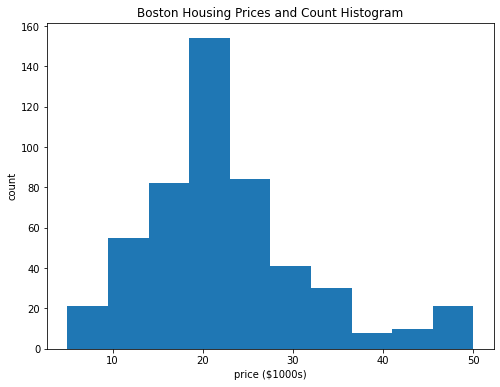

In [ ]:
plt.figure(figsize=(8, 6));
plt.hist(bos_pd['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000s)');
plt.ylabel('count');
plt.show();

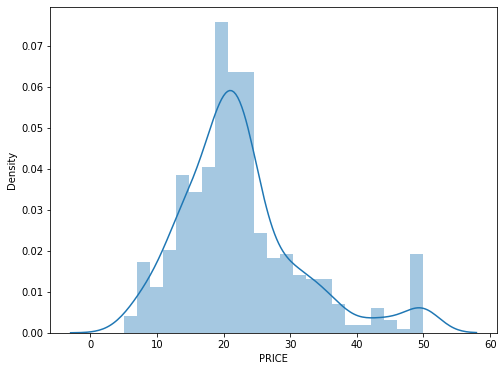

In [ ]:
plt.figure(figsize=(8, 6));
sns.distplot(bos_pd['PRICE']);

From the above output we can see that the values of PRICE is normally distributed with some of the outliers.

#### Heatmap: Two-Dimensional Graphical Representation
- Represent the individual values that are contained in a matrix as colors.
- Create a correlation matrix that measures the linear relationships between the variables.

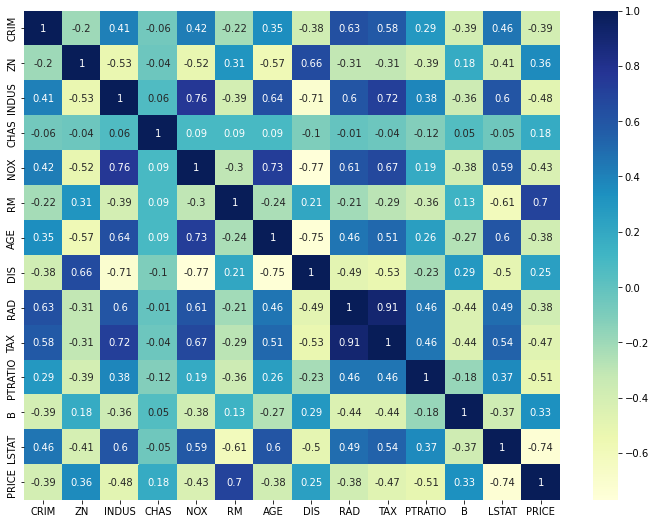

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix = bos_pd.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

- **RM** has a strong positive correlation with **PRICE** (0.7) where as **LSTAThas** a high negative correlation with **PRICE** (-0.74).
- The features **RAD**, **TAX** have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features **DIS** and **AGE** which have a correlation of -0.75.
- The predictor variables such as **CRIM**, **INDUS**, **NOX**, **Age**, **RAD**, **TAX**, **PTRATIO**, **LSTAT** have a negative correlation on the target. Increase of any of them leads to the decrease in the price of the housing.
- The predictor variables such as **ZN**, **RM**, **DIS**, **B** have good positive correlation with the target. Increase in any of them leads to the increase in the price of the house.

In [ ]:
for feature_name in boston_data.feature_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(bos_pd[feature_name], bos_pd['PRICE']);
    plt.ylabel('Price', size=12);
    plt.xlabel(feature_name, size=12);
plt.show();

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Based on the above observations we will plot an `lmplot` between **RM** and **PRICE** to see the relationship between the two more clearly.

In [ ]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd);

## <font color="blue">Model Selection Process</font>

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. 
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model. 
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category our current dataset falls into:
- We have 506 samples: >50? (**Yes**)
- Are we predicting a category? (**No**)
- Are we predicting a quantity? (**Yes**)

Based on the checklist that we prepared above and going by the `machine_learning_map` we can try out **regression methods** such as:

- Linear Regression 
- Lasso
- ElasticNet Regression
- Ridge Regression: 
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

Check the following documents on regresssion: 
<a href="https://scikit-learn.org/stable/supervised_learning.html">Supervised learning--scikit-learn</a>,
<a href="https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/">Learn regression algorithms using Python and scikit-learn</a>,
<a href="https://www.pluralsight.com/guides/non-linear-">Non-Linear Regression Trees with scikit-learn</a>.

## <font color="red">Simple Linear Model</font>
- It is difficult to visualize the multiple features.
- We want to predict the house price with just one variable and then move to the regression with all features.
- Because **RM** shows positive correlation with the **House Prices**, we will use **RM** for the model.

In [ ]:
X_rooms = bos_pd.RM
y_price = bos_pd.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

#### Splitting the data into training and testing sets
- We split the data into training and testing sets. 
- We train the model with 80% of the samples and test with the remaining 20%. 
- We do this to assess the model’s performance on unseen data.

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

#### Training and testing the model
- We use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets.
- We check the model performance on the train dataset.

In [ ]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

#### Model Evaluation for Test Set

In [ ]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(Y_test_1, y_pred_1) :.4f}')

#### 45-Degree Plot

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

## <font color="red">Linear Regression Model with All Variables</font>
- We want to create a model considering all the features in the dataset.

#### Create the Model

In [ ]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

The linear regression model:

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

#### Model Evaluation for Training Set

In [ ]:
y_train_predict = reg_all.predict(X_train)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

#### Model Evaluation for Test Set

In [ ]:
y_pred = reg_all.predict(X_test)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred) :.4f}')

#### Error Distribution

In [ ]:
sns.distplot(y_test - y_pred);

#### 45-Degree Plot

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

In [ ]:
df2.plot(kind='bar');

## <font color="red">Choosing the Best Model:</font> k-Fold Cross-Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
- We use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
- The biggest advantage of this method is that every data point is used for validation exactly once and for training `k-1` times.
- To choose the final model to use, we select the one that has the lowest validation error.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into `k` groups
3. For each unique group:
       3.1 Take the group as a hold out or test data set
       3.2 Take the remaining k-1 groups as a training data set
       3.3 Fit a model on the training set and evaluate it on the test set
       3.4 Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

How to choose **k**?
- A poorly chosen value for **k** may result in a mis-representative idea of the skill of the model, such as a score with a high variance, or a high bias.
- The choice of **k** is usually 5 or 10, but there is no formal rule. As **k** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.
- A value of **k=10** is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

Below is the visualization of a k-fold validation when k=5.
![FIG_kFold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
Image Source: https://scikit-learn.org/



In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3), 
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()

ValueError: ignored

**Based on the above comparison, we can see that `Gradient Boosting Regression` model outperforms all the other regression models.**

## <font color="red">Model with Gradient Boosted Tree</font>


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

**Root Mean Square Error:**

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

**The coefficient of determination**: (1 is perfect prediction)

In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

#### Error Distribution

In [ ]:
sns.distplot(gbr_expected - gbr_predicted);

#### 45-Degree Plot

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

**Zoom in:**

In [ ]:
df1 = pd.DataFrame({'Actual': gbr_expected, 'Predicted': gbr_predicted})
df2 = df1.head(10)
df2

In [ ]:
df2.plot(kind='bar');

#### Feature Importance
- Once we have a trained model, we can understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

In [ ]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.yticks(pos, boston_data.feature_names[sorted_idx]);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

**Plot training deviance:**

In [ ]:
n_estimators = 100
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(gbr_expected, y_pred)

plt.figure(figsize=(12, 6));
plt.subplot(1, 1, 1);
plt.title('Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         gbr.train_score_, 'b-',
         label='Training Set Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         test_score, 'r-',
         label='Test Set Deviance');
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');

# <font color="blue">Image Classification</font>

## <font color="red"> MNIST Dataset</font>

- The <A HREF="https://en.wikipedia.org/wiki/MNIST_database"> MNIST database</A> (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
- The database is also widely used for training and testing in the field of machine learning.
- The dataset we will be using contains 70000 images of handwritten digits among which 10000 are reserved for testing.
- This dataset is  suitable for anyone who wants to get started with image classification using Scikit-Learn. 

### Obtain the Dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [ ]:
print(mnist_data.DESCR)

### Features of the Dataset

In [ ]:
print("Keys: ", mnist_data.keys())

**Note that the `data` and `target` already separated.**

In [ ]:
print("Shape of Data: ", mnist_data.data.shape)

In [ ]:
print("Datatype of Data: ", type(mnist_data.data))

In [ ]:
print("Shape of the Target Data: ", mnist_data.target.shape)

In [ ]:
print("Datatype of Target Data: ", type(mnist_data.target))

In [ ]:
print("Feature Names: ", mnist_data.feature_names)

In [ ]:
print("Url: ", mnist_data.url)

In [ ]:
np_data, np_target = mnist_data['data'], mnist_data['target']
print(' Shape of data:   {} \n Shape of target: {}'.format(np_data.shape, np_target.shape))

**Checking the Data**

In [ ]:
len(np.unique(np_data))

In [ ]:
np_data[0]

In [ ]:
len(np.unique(np_data[0]))

**Checking the Target**

In [ ]:
print("Datatype of the target values: ", np_target.dtype)

In [ ]:
type(np_target[0])

Print few values:

In [ ]:
print(np_target[0:5])

Changing the labels from string to integers:

In [ ]:
np_target = np_target.astype(np.uint8)

In [ ]:
print(np_target[0:5])

Print the number of unique labels:

In [ ]:
len(np.unique(np_target))

There are 70000 numbers, each stored as an array of 784 numbers depicting the opacity of each pixel, it can be displayed by reshaping the data into a 28x28 array and plotting using matplotlib

In [ ]:
some_index = 15657
some_digit = np_data[some_index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis=('off')

In [ ]:
np_target[some_index]

**Display few images**

In [ ]:
def display_digits(X, y):
    """
      Given an array of images of digits X and 
      the corresponding values of the digit y,
      this function plots the first 96 images and their values.
    """
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(8, 6))

    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(96):
        # Initialize the subplots: 
        #    Add a subplot in the grid of 8 by 12, at the i+1-th position
        ax = fig.add_subplot(8, 12, i + 1, xticks=[], yticks=[])
        
        # Display an image at the i-th position
        ax.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
       
        # label the image with the target value
        ax.text(0, 7, str(y[i]))

    # Show the plot
    plt.show()

In [ ]:
display_digits(np_data, np_target)

### <font color="red">Separating the Training and Testing Set</font>

In [ ]:
num_train = 60000

X_train = np_data[:num_train]
X_test  = np_data[num_train:]
y_train = np_target[:num_train]
y_test  = np_target[num_train:]

In [ ]:
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n',
     'Train label: ', y_train, '\n', 'Test Label: ', y_test)

**Shuffle the training set:**

In [ ]:
shuffle_index = np.random.permutation(nn)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

###  <font color="red">Training a Binary Classifier</font>

- Binary classification means there are two classes to work with that relate to one another as true and false.
- Here, we want to identify a single digit: looking at 9s.
- The classification will tell us if we have a 9 (true) or not (false).

**Set the target arrays as boolean arrays:** true if 9 otherwise false.

In [ ]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

**Create and train the model:**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf =SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_9)

**Make a prediction:**

In [ ]:
some_digit_predict = sgd_clf.predict([some_digit])

In [ ]:
some_digit_predict

**Measuring accuracy using cross validation**

- The `stratifiedKfold` class performs stratified sampling to produce folds that contain a representative ratio of each class. 
- At each iteration the code creates a clone of the classifier, trains that clone on the training fold and then makes predictions on the test fold. 
- It then counts the number of correct predictions and outputs the ratio of correct predictions.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')

The sklearn cross_val_score in action returning the same result.

In [ ]:
print('94-96% accuracy might not as impressive as it sounds where there are {:.2f} percent 9s in the dataset'.format(sum(np_target==9)/len(np_target)*100))

**Confusion matrix**

- A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. 
- It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.
- The confusion matrix is a much better way to evaluate the performance of a classifier, especially when there is a skewed dataset as we have here with only 10% of the dataset being the target.
- Each row represents a class, each column a prediction:
   * The first row is negative cases (non-9s) with the top left containing all the correctly classified non-9s (True Negatives), the top right the 9s incorrectly classified as non-9s (False-Positves).
   * The second row represents the positive class, 9s in this case, bottom left contains the 9s incorrectly classified as non-9s (False Negatives), the bottom right containing the correctly classified 9s (True Positives)
   
| | Actual | |
| --- |: --- |: --- |
| **Prediction** | True Positive | False Positive |
| | False Negative | True Negative |

We first need a set of predictions to compare to the actual targets:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

**Precision/Recall**

- Precision measures the number of true positives (correctly classified 9s) as a ratio of the total samples classified as a 9: $\frac{TP}{TP + FP}$
- Recall measueres the number of true positives as a ratio of the total number of positives: $\frac{TP}{TP + FN}$
- Depending on the scenario the model may be modified to try and maximise one or the other, catching all positive instances at the expense of catching some false positives. Or making sure a positive instance is never falsely identified as a negative at the expense of missing some of the positive instances.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12,8))
    plt.title('Precision and recall vs decision threshold')
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### <font color="red">Training and Prediction on the Entire Dataset</font>

- We will use the Stochastic Gradient Descent classifier (SGD). 
- Scikit-Learn’s SGDClassifier is a good starting point for linear classifiers. 
- Using the loss parameter we will see how Support Vector Machine (Linear SVM) and Logistic Regression perform for the same dataset.


#### Using Linear Support Vector Machine (SVM)
- We use linear SVM with stochastic gradient descent (SGD) learning.
- The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.
- To use the Linear SVM Classifier, we need to set the loss parameter to `hinge`. 

In [ ]:
from sklearn.linear_model import SGDClassifier
 
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

- Before testing the model, it is a good practice to first see the cross-validation scores on the training data. 
- That you will give you a very good projection of how the model performs.

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

* For three-fold Cross-Validation you are getting around 87% – 88% accuracy. 
* Not too bad, not too good either.

We can now compute the actual test scores:

In [ ]:
scoreSVM = sgd_clf.score(X_test, y_test)
print("Test score of the Linear SVM: ", scoreSVM)

### Using Logistic Regression

In [ ]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(X_train, y_train)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
scoreLR = sgd_clf.score(X_test, y_test)
print("Test score of the Logistic Regression: ", scoreLR)

### Random Forest Classifier

- Random forests is a supervised learning algorithm. 
- A forest is comprised of trees. 
- It is said that the more trees it has, the more robust a forest is. 
- Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 
- It also provides a pretty good indicator of the feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train, y_train)

In [ ]:
forest_output = forest.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("Random Forest with n_estimators:500")
print(accuracy_score(y_test, forest_output))

Display few true images against predictions:

In [ ]:
display_digits(X_test, forest_output)

### Gradient Boosting Classifier



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train,y_train)

In [ ]:
gradient_output = clf.predict(X_test) 

Calculate accuracy on the prediction:

In [ ]:
print(accuracy_score(y_test, gradient_output))

Display few true images against predictions:

In [ ]:
display_digits(X_test, gradient_output)

### MLP Classifier

- The Multi-layer Perceptron classifier relies on an underlying Neural Network to perform the task of classification.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(10,), random_state=1)
clf.fit(X_train, y_train)   
neural_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("sgd: ", accuracy_score(y_test, neural_output))

Display few true images against predictions:

In [ ]:
display_digits(X_test, neural_output)

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=1)
clf.fit(X_train, y_train)   
neural_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("lbfgs: ", accuracy_score(y_test, neural_output))

Display few true images against predictions:

In [ ]:
display_digits(X_test, neural_output)